In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv(r'C:\Users\Ahana Drall\Documents\data_science\data_sets\customer-segmentation-dataset\Mall_Customers.csv')

In [4]:
change={"Gender": {"Male":0, "Female":1}}
df.replace(change, inplace=True)


# Age v/s Gender

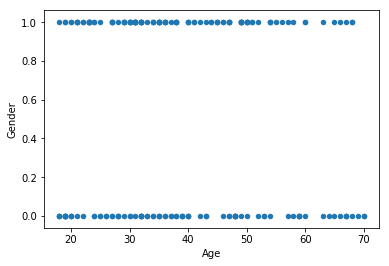

In [55]:
df.plot.scatter(x='Age', y='Gender')

# Annual Income v/s Spending Score

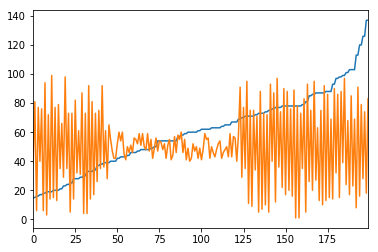

In [38]:
df['Annual Income (k$)'].plot()
df['Spending Score (1-100)'].plot()

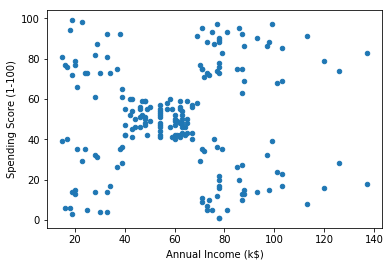

In [35]:
df.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)')

# Age v/s Annual Income v/s Spending Score

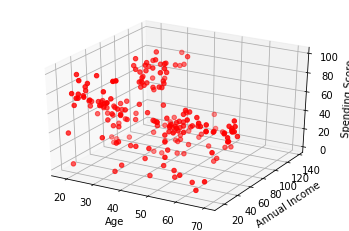

In [54]:
fig= plt.figure()
ax= fig.add_subplot(111, projection='3d')

X= [df['Age']]
Y=[df['Annual Income (k$)']]
Z=[df['Spending Score (1-100)']]

ax.scatter(X,Y,Z, c='red',marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.show()

#     Clustering Based On Age and Spending Score

Text(0, 0.5, 'Spending Score (1-100)')

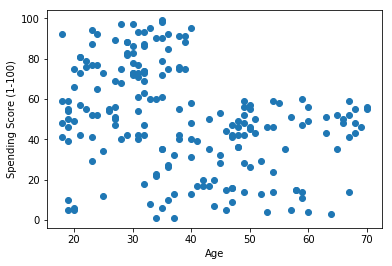

In [63]:
plt.scatter(df['Age'],df['Spending Score (1-100)'])

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')


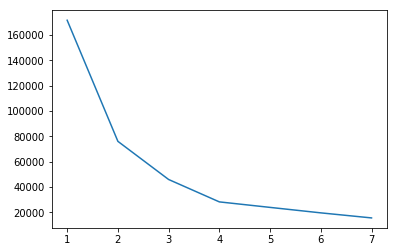

In [64]:
SSE = []
for i in range (1,8):
    km= KMeans(n_clusters=i)
    km.fit(df.iloc[:,[2,4]])
    SSE.append(km.inertia_)
plt.plot(range(1,8), SSE)
plt.show()

In [65]:
km= KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
#df_t2= (df_t1['1'], df_t1['2'], df_t1['3'], df_t1['4'])
y_pred= km.fit_predict(df.iloc[:,[2,4]])
y_pred


array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [67]:
df['cluster']= y_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,3
1,2,0,21,15,81,2
2,3,1,20,16,6,1
3,4,1,23,16,77,2
4,5,1,31,17,40,3


Text(0, 0.5, 'Spending Score(k$)')

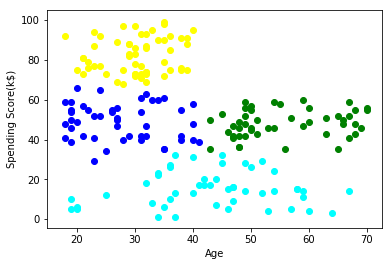

In [70]:
df_green = df[df.cluster==0]
df_cyan = df[df.cluster==1]
df_yellow= df[df.cluster==2]
df_blue= df[df.cluster==3]

plt.scatter(df_green.iloc[:,2],df_green.iloc[:,4], color='green')
plt.scatter(df_cyan.iloc[:,2], df_cyan.iloc[:,4],color='cyan')
plt.scatter(df_yellow.iloc[:,2],df_yellow.iloc[:,4], color='yellow')
plt.scatter(df_blue.iloc[:,2],df_blue.iloc[:,4], color='blue')

plt.xlabel('Age')
plt.ylabel('Spending Score(k$)')

# Clustering Based On Gender and Spending Score

In [71]:
df1=df.copy()
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,3
1,2,0,21,15,81,2
2,3,1,20,16,6,1
3,4,1,23,16,77,2
4,5,1,31,17,40,3


Text(0, 0.5, 'Gender')

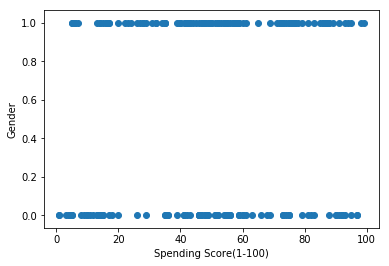

In [74]:
plt.scatter(df1['Spending Score (1-100)'], df1['Gender'])

plt.xlabel('Spending Score(1-100)')
plt.ylabel('Gender')

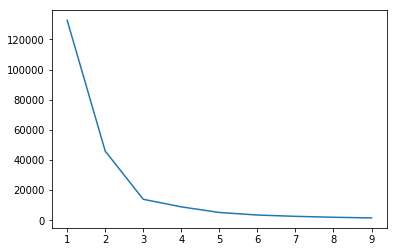

In [75]:
SSE = []
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(df1.iloc[:,[1,4]])
    SSE.append(km.inertia_)
plt.plot(range(1,10),SSE)
plt.show()

In [43]:
km= KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
y_pred=km.fit_predict(df1.iloc[:,[1,4]])
y_pred

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [45]:
df1['clusters']=y_pred
df1.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,clusters
0,1,0,19,15,39,2,2
1,2,0,21,15,81,1,1
2,3,1,20,16,6,3,0
3,4,1,23,16,77,1,1
4,5,1,31,17,40,2,2


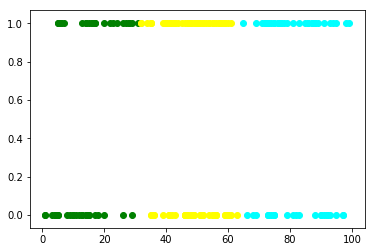

In [49]:
df_green = df1[df1.clusters==0]
df_cyan = df1[df1.clusters==1]
df_yellow= df1[df1.clusters==2]

plt.scatter(df_green.iloc[:,4],df_green.iloc[:,1], color='green')
plt.scatter( df_cyan.iloc[:,4],df_cyan.iloc[:,1],color='cyan')
plt.scatter(df_yellow.iloc[:,4],df_yellow.iloc[:,1], color='yellow')

# Clustering Based On Annual Income and Spending Score

In [18]:
df2=df.copy()
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,1
2,3,1,20,16,6,3
3,4,1,23,16,77,1
4,5,1,31,17,40,2


Text(0, 0.5, 'Spending Score(1-100)')

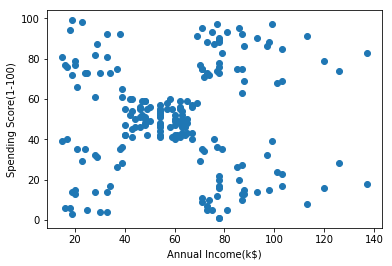

In [76]:
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'])

plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')

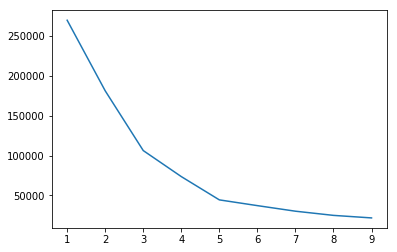

In [20]:
SSE = []
for i in range(1,10):
    km= KMeans(n_clusters=i)
    km.fit(df2.iloc[:,[3,4]])
    SSE.append(km.inertia_)
plt.plot(range(1,10), SSE)
plt.show()

In [21]:
km= KMeans(n_clusters=5)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
y_pred= km.fit_predict(df.iloc[:,[3,4]])
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [23]:
df2["clusterss"]=y_pred
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,clusterss
0,1,0,19,15,39,2,4
1,2,0,21,15,81,1,3
2,3,1,20,16,6,3,4
3,4,1,23,16,77,1,3
4,5,1,31,17,40,2,4


Text(0, 0.5, 'Spending Score(1-100)')

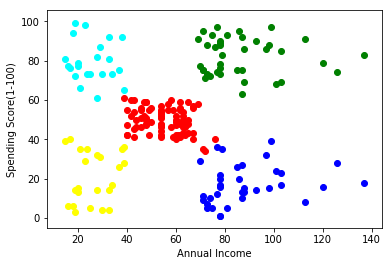

In [77]:
df_red= df2[df2.clusterss==0]
df_green= df2[df2.clusterss==1]
df_blue= df2[df2.clusterss==2]
df_cyan= df2[df2.clusterss==3]
df_yellow= df2[df2.clusterss==4]

plt.scatter(df_red.iloc[:,3],df_red.iloc[:,4], color='red')
plt.scatter(df_green.iloc[:,3],df_green.iloc[:,4], color='green')
plt.scatter(df_blue.iloc[:,3],df_blue.iloc[:,4], color='blue')
plt.scatter(df_cyan.iloc[:,3],df_cyan.iloc[:,4], color='cyan')
plt.scatter(df_yellow.iloc[:,3],df_yellow.iloc[:,4], color='yellow')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score(1-100)')



# Clustering Based on Age, Annual Income and Spending Score

In [25]:
df3=df.copy()
df3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,1
2,3,1,20,16,6,3
3,4,1,23,16,77,1
4,5,1,31,17,40,2


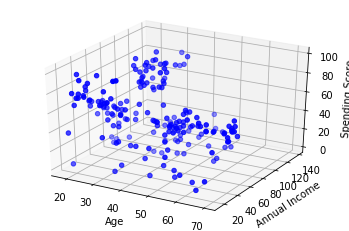

In [26]:
fig= plt.figure()
ax= fig.add_subplot(111, projection='3d')

X= [df3['Age']]
Y=[df3['Annual Income (k$)']]
Z=[df3['Spending Score (1-100)']]

ax.scatter(X,Y,Z, c='blue',marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.show()

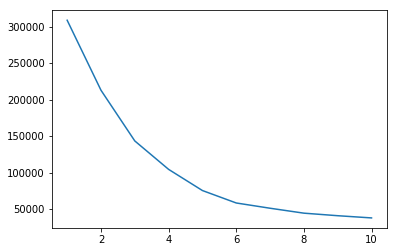

In [32]:
SSE = []
for i in range(1,11):
    km= KMeans(n_clusters=i)
    km.fit(df3.iloc[:,[2,3,4]])
    SSE.append(km.inertia_)
plt.plot(range(1,11), SSE)
plt.show()

In [28]:
km= KMeans(n_clusters=6)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
y_pred= km.fit_predict(df.iloc[:,[2,3,4]])
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 0,
       3, 4, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, 0,
       5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 0, 5, 5, 0,
       0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [30]:
df3["clusters"]=y_pred
df3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,clusters
0,1,0,19,15,39,2,3
1,2,0,21,15,81,1,4
2,3,1,20,16,6,3,3
3,4,1,23,16,77,1,4
4,5,1,31,17,40,2,3


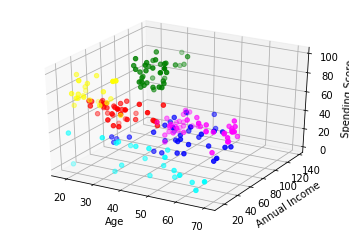

In [79]:
fig= plt.figure()
ax= fig.add_subplot(111, projection='3d')

df_red= df3[df3.clusters==0]
df_green= df3[df3.clusters==1]
df_blue= df3[df3.clusters==2]
df_cyan= df3[df3.clusters==3]
df_yellow= df3[df3.clusters==4]
df_magenta= df3[df3.clusters==5]

ax.scatter(df_red.iloc[:,2],df_red.iloc[:,3],df_red.iloc[:,4], color='red')
ax.scatter(df_green.iloc[:,2],df_green.iloc[:,3],df_green.iloc[:,4], color='green')
ax.scatter(df_blue.iloc[:,2],df_blue.iloc[:,3],df_blue.iloc[:,4], color='blue')
ax.scatter(df_cyan.iloc[:,2],df_cyan.iloc[:,3],df_cyan.iloc[:,4], color='cyan')
ax.scatter(df_yellow.iloc[:,2],df_yellow.iloc[:,3],df_yellow.iloc[:,4], color='yellow')
ax.scatter(df_magenta.iloc[:,2],df_magenta.iloc[:,3],df_magenta.iloc[:,4], color='magenta')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.show()

# Conclusion

The companies should target their customers based on the clusters provided above. They should take care of the customers with high income and high spending scores, and also work towards the interest of the customers with high income, low spending scores and low income, high spending scores. They should take intense care of the customers in the yellow and the green cluster. and also, should get to know more about the customers in the pink cluster, as to why they do not spend more more on the products, even when they they high incomes. the customers in the cyan cluster are really not of much importance to the company. 